<a href="https://colab.research.google.com/github/Aadhithyas123/Machine-Learning-Projects/blob/main/Super_Resolution_iadf_aadhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super-Resolution Exercises

## Exercise 1: Basic Upsampling Techniques

**Objective:** Implement and compare basic upsampling techniques using opencv.

**Tasks:**
1. Load an image.
2. Downsample the image.
3. Apply various upsampling techniques.
4. Display the results.
5. Save the results.

**Code**

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

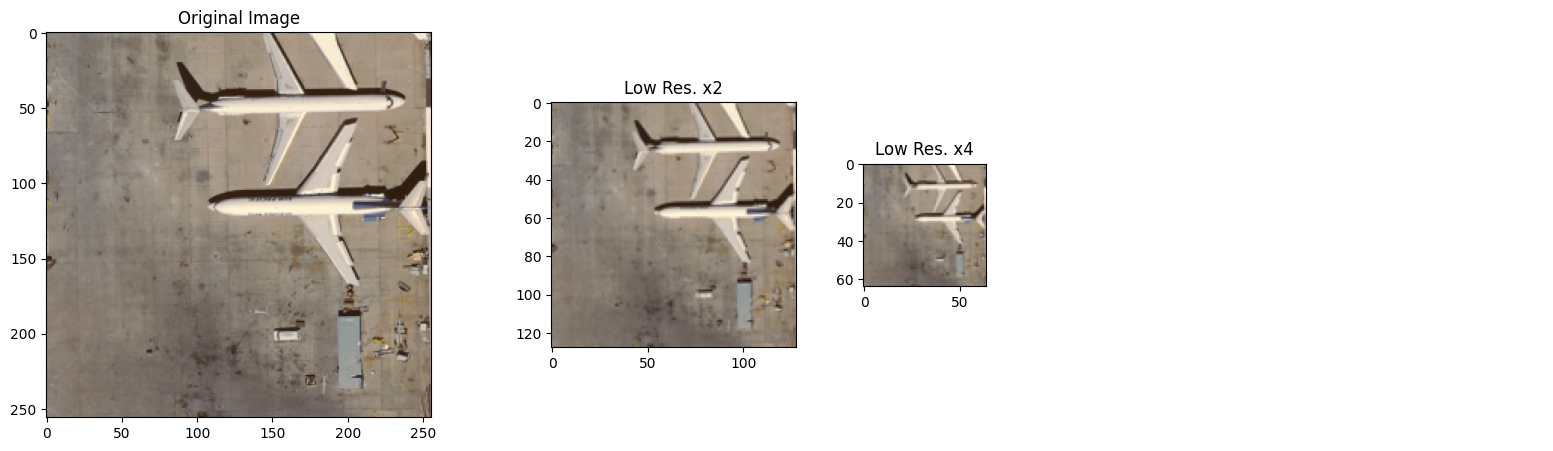

In [2]:
# Load an image
image_hr = Image.open('/content/image_hr.png').convert('RGB')
image_lr_2 = Image.open('/content/image_lr_2.png').convert('RGB')
image_lr_4 = Image.open('/content/image_lr_4.png').convert('RGB')

# Create a figure with subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), gridspec_kw={'width_ratios': [1, 0.5, 0.25, 1]})

# Display each image in a subplot
axs[0].imshow(image_hr)
axs[0].set_title('Original Image')
axs[0].axis('on')

axs[1].imshow(image_lr_2)
axs[1].set_title('Low Res. x2')
axs[1].axis('on')

axs[2].imshow(image_lr_4)
axs[2].set_title('Low Res. x4')
axs[2].axis('on')

axs[3].axis('off')

plt.show()

<ipython-input-6-99ecc6d15889>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  downsampled_image = image_lr_2 .resize(new_size, Image.ANTIALIAS)


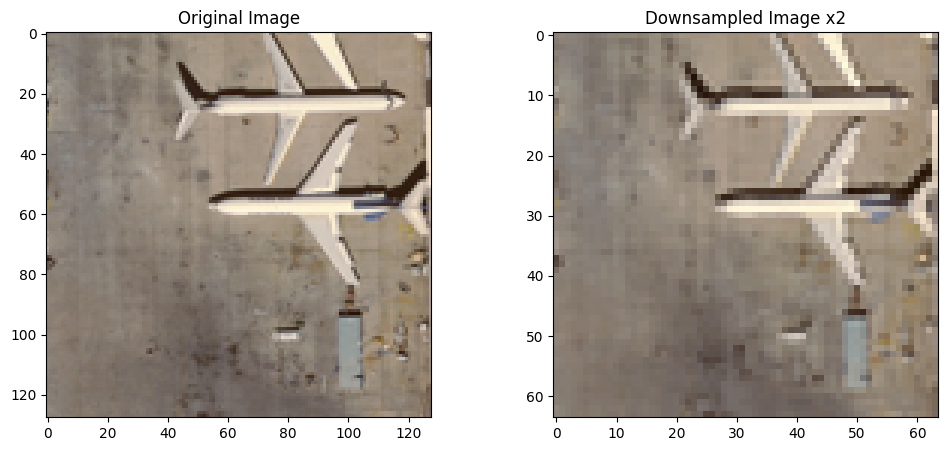

In [6]:
#Downsample the image.

# Set the downsampling factor
downsample_factor = 2  # This will reduce the dimensions by half

# Calculate the new size
new_size = (image_lr_2 .width // downsample_factor, image_lr_2 .height // downsample_factor)

# Downsample the image
downsampled_image = image_lr_2 .resize(new_size, Image.ANTIALIAS)

# Save the downsampled image
downsampled_image.save('downsampled_image.jpg')

# Create a figure with subplots to display both images
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Display the original image in the first subplot
axs[0].imshow(image_lr_2)
axs[0].set_title('Original Image')
axs[0].axis('on')

# Display the downsampled image in the second subplot
axs[1].imshow(downsampled_image)
axs[1].set_title(f'Downsampled Image x{downsample_factor}')
axs[1].axis('on')

plt.show()

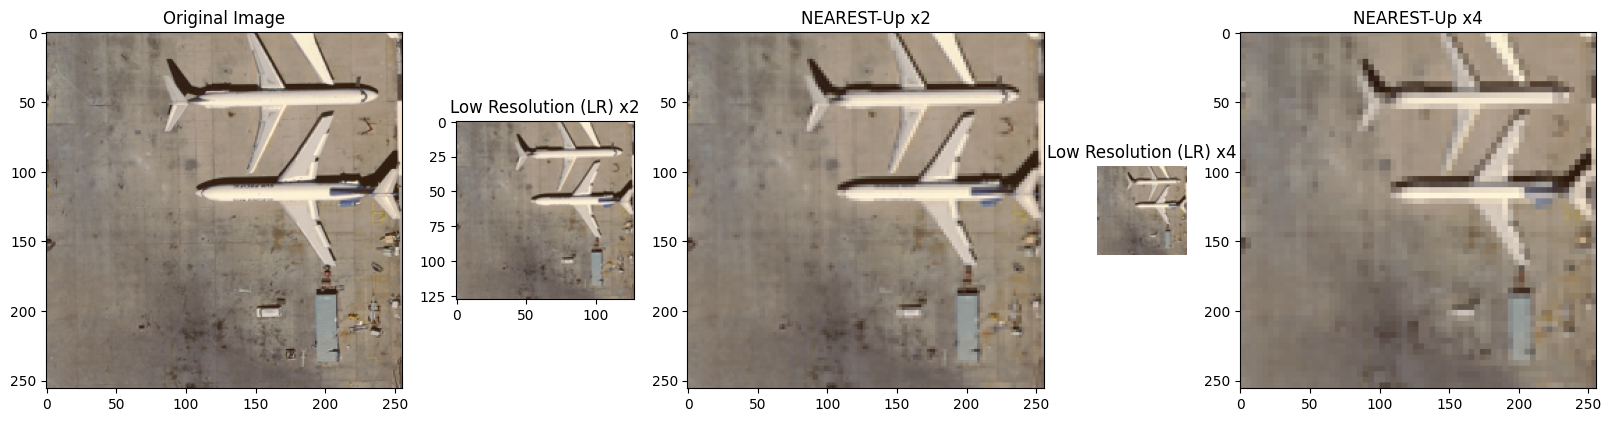

In [3]:
def nearest_neighbor_upsample(image, scale_factor):
    image = np.array(image)
    return Image.fromarray(cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST))

nn_upscaled_image_2 = nearest_neighbor_upsample(image_lr_2, 2)
nn_upscaled_image_4 = nearest_neighbor_upsample(image_lr_4, 4)

# Create a figure with subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 5), gridspec_kw={'width_ratios': [1, 0.5, 1, 0.25, 1]})

# Display each image in a subplot
axs[0].imshow(image_hr)
axs[0].set_title('Original Image')
axs[0].axis('on')

axs[1].imshow(image_lr_2)
axs[1].set_title('Low Resolution (LR) x2')
axs[1].axis('on')

axs[2].imshow(nn_upscaled_image_2)
axs[2].set_title('NEAREST-Up x2')
axs[2].axis('on')

axs[3].imshow(image_lr_4)
axs[3].set_title('Low Resolution (LR) x4')
axs[3].axis('off')

axs[4].imshow(nn_upscaled_image_4)
axs[4].set_title('NEAREST-Up x4')
axs[4].axis('on')

plt.show()

## Exercise 2: Compute PSNR and SSIM

**Objective:** Compute PSNR and SSIM for comparing image quality.

**Tasks:**
1. Implement functions to compute PSNR and SSIM.
2. Load the previous image saved.
3. Evaluate these metrics for different upsampling methods.

/usr/local/lib/python3.10/dist-packages/skimage/metrics/simple_metrics.py:167: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)


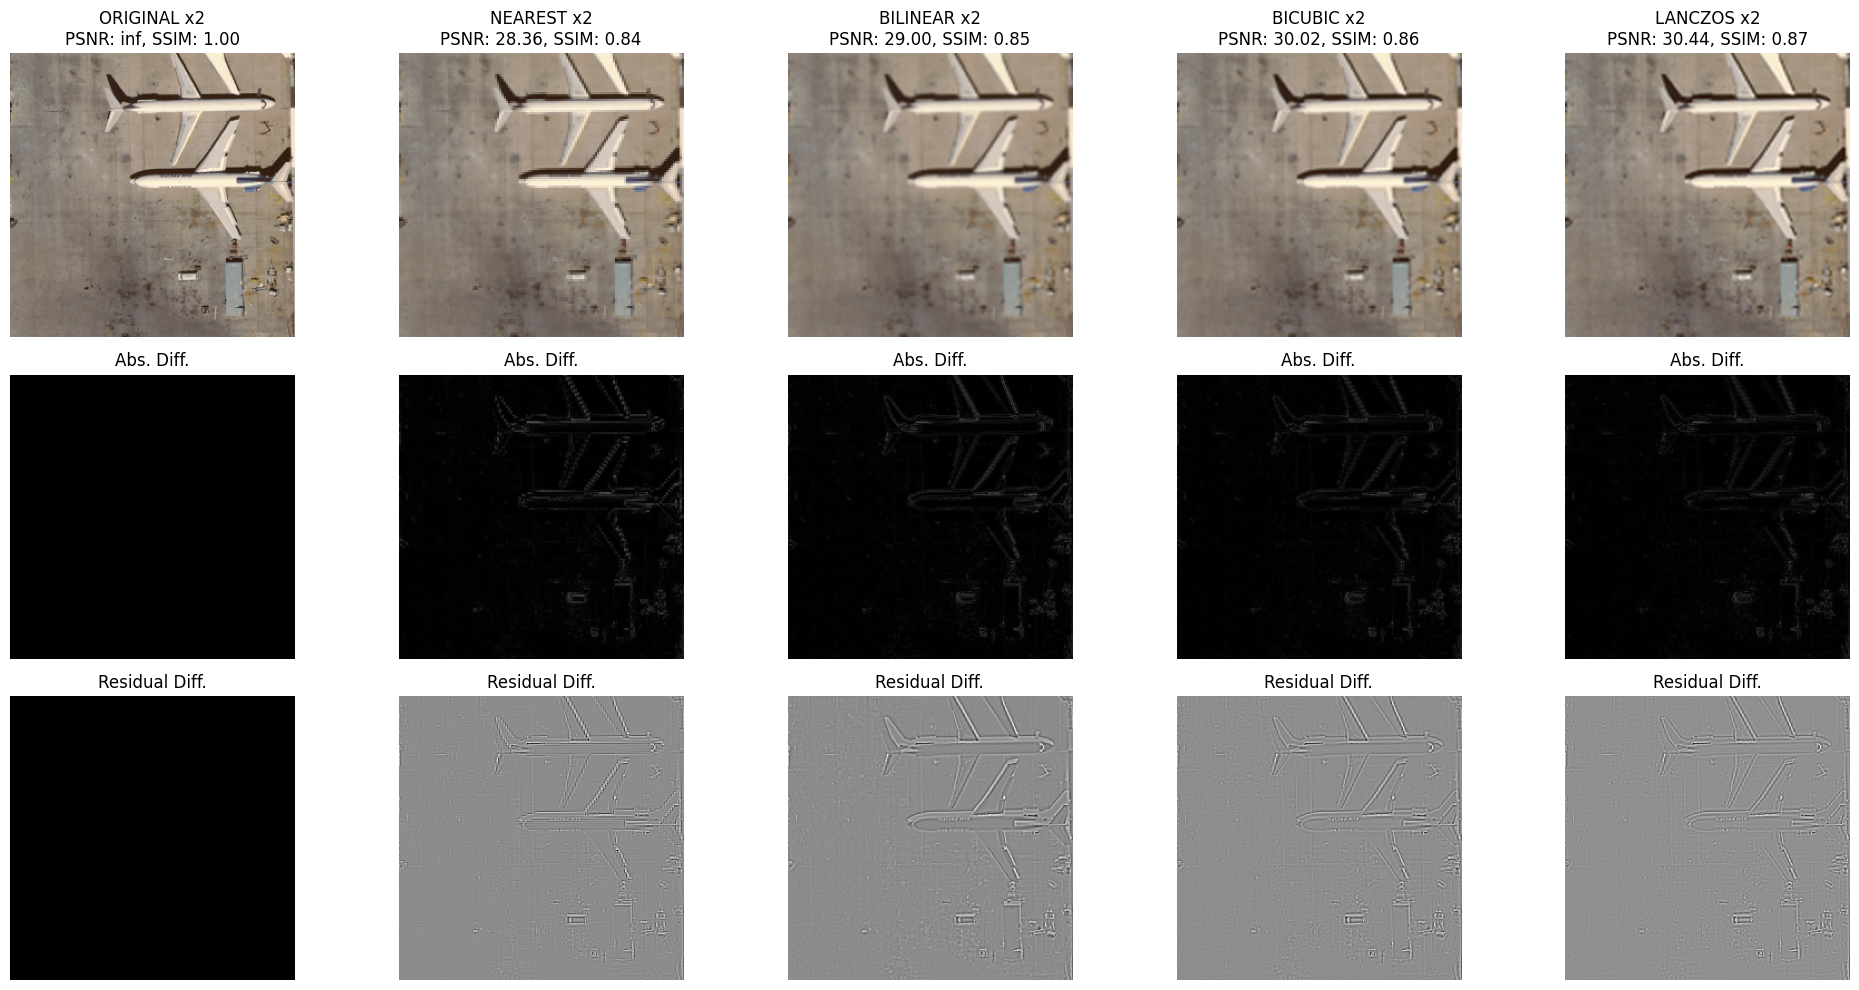

In [8]:
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Define function to calculate absolute difference
def absolute_difference(image1, image2):
    image1 = np.array(image1).astype("float32")
    image2 = np.array(image2).astype("float32")
    return np.abs(image1 - image2)

# Define function to calculate residual difference
def residual(image1, image2):
    image1 = np.array(image1).astype("float32")
    image2 = np.array(image2).astype("float32")
    return image1 - image2

# Define function to prepare heatmap
def prepare_heatmap(heatmap, scaleHM=False):
    if scaleHM:
        if heatmap.max() != heatmap.min():
            heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min()) * 255
    heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
    if len(heatmap.shape) == 3:
        heatmap = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
    return heatmap

# Define upsampling function
def upsample(image, scale_factor, method):
    if method == "BILINEAR":
        method_up = Image.BILINEAR
    elif method == "BICUBIC":
        method_up = Image.BICUBIC
    elif method == "NEAREST":
        method_up = Image.NEAREST
    elif method == "LANCZOS":
        method_up = Image.LANCZOS
    else:
        print(method, "not found, using BICUBIC")
        method_up = Image.BICUBIC
    return image.resize((int(image.width * scale_factor), int(image.height * scale_factor)), method_up)

# Load images (convert to RGB for consistency)
image_hr = Image.open('/content/image_hr.png').convert('RGB')
image_lr_2 = Image.open('/content/image_lr_2.png').convert('RGB')
image_lr_4 = Image.open('/content/image_lr_4.png').convert('RGB')

# Define methods and create figure with subplots
methods = ["ORIGINAL", "NEAREST", "BILINEAR", "BICUBIC", "LANCZOS"]
fig, axs = plt.subplots(3, 5, figsize=(20, 10), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1]})

# Process each method (Original + Upsampling methods)
for idx, method in enumerate(methods):
    if method == "ORIGINAL":
        image_up = image_hr
    else:
        image_up = upsample(image_lr_2, scale_factor=2, method=method)

    # Compute PSNR and SSIM
    psnr_value = psnr(np.array(image_hr), np.array(image_up))
    ssim_value = ssim(np.array(image_hr), np.array(image_up), win_size=3, channel_axis=-1)

    # Calculate absolute difference and residual
    abs_diff = absolute_difference(image_hr, image_up)
    residual_img = residual(image_up, image_hr)

    # Display upsampled image
    axs[0, idx].imshow(image_up)
    axs[0, idx].set_title(f'{method} x2\nPSNR: {psnr_value:.2f}, SSIM: {ssim_value:.2f}')
    axs[0, idx].axis('off')

    # Display absolute difference heatmap
    axs[1, idx].imshow(prepare_heatmap(abs_diff), cmap='gray', vmin=0, vmax=255)
    axs[1, idx].set_title(f"Abs. Diff.")
    axs[1, idx].axis('off')

    # Display residual heatmap
    axs[2, idx].imshow(prepare_heatmap(residual_img, scaleHM=True), cmap='gray', vmin=0, vmax=255)
    axs[2, idx].set_title(f"Residual Diff.")
    axs[2, idx].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()
